Source : https://www.kaggle.com/code/muhammadehabmuhammad/supermarket-sales-analysis

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Display Options
pd.options.display.float_format = "{:.3f}".format
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Datasets

In [2]:
df = pd.read_csv("sales.csv")

# Schema Used To Serach For Column Description
df_schema = pd.read_csv("data_description.csv")

## data Schema Preparation

In [3]:
df_schema["column_name"] = df_schema["column_name"].str.replace(" ", "_").str.upper()
df_schema.set_index("column_name", inplace=True)

In [4]:
# Function Used To Search For Any Column That You Don't Know its description
def get_column_info(col_name):
    print(df_schema.loc[col_name.upper()][0])

# Data Understanding

In [5]:
df.shape

(1000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690,7,26.142,548.971,1/5/2019,13:08,Ewallet,522.830,4.762,26.142,9.100
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280,5,3.820,80.220,3/8/2019,10:29,Cash,76.400,4.762,3.820,9.600
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330,7,16.215,340.526,3/3/2019,13:23,Credit card,324.310,4.762,16.215,7.400
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220,8,23.288,489.048,1/27/2019,20:33,Ewallet,465.760,4.762,23.288,8.400
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310,7,30.209,634.379,2/8/2019,10:37,Ewallet,604.170,4.762,30.209,5.300


In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,55.672,5.510,15.379,322.967,307.587,4.762,15.379,6.973
std,26.495,2.923,11.709,245.885,234.177,0.000,11.709,1.719
min,10.080,1.000,0.508,10.678,10.170,4.762,0.508,4.000
25%,32.875,3.000,5.925,124.422,118.498,4.762,5.925,5.500
50%,55.230,5.000,12.088,253.848,241.760,4.762,12.088,7.000
75%,77.935,8.000,22.445,471.350,448.905,4.762,22.445,8.500
max,99.960,10.000,49.650,1042.650,993.000,4.762,49.650,10.000


# Data Preparation

### ***Look At Nan Values***

In [9]:
((df.isna().sum() / df.shape[0]) * 100).sort_values(ascending=False)

Invoice ID                0.000
Branch                    0.000
City                      0.000
Customer type             0.000
Gender                    0.000
Product line              0.000
Unit price                0.000
Quantity                  0.000
Tax 5%                    0.000
Total                     0.000
Date                      0.000
Time                      0.000
Payment                   0.000
cogs                      0.000
gross margin percentage   0.000
gross income              0.000
Rating                    0.000
dtype: float64

### ***Clean & Rename Column Names***

In [10]:
df.columns = df.columns.str.replace(" ", "_")

In [11]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating'],
      dtype='object')

# ***Drop Columns***

In [12]:
df["Invoice_ID"].nunique()

1000

In [13]:
# Drop Not needed Row_Id & Postal_code with nan values
df.drop(columns=["Invoice_ID"], inplace=True)

In [14]:
df.head()

,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.690,7,26.142,548.971,1/5/2019,13:08,Ewallet,522.830,4.762,26.142,9.100
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.280,5,3.820,80.220,3/8/2019,10:29,Cash,76.400,4.762,3.820,9.600
2,A,Yangon,Normal,Male,Home and lifestyle,46.330,7,16.215,340.526,3/3/2019,13:23,Credit card,324.310,4.762,16.215,7.400
3,A,Yangon,Member,Male,Health and beauty,58.220,8,23.288,489.048,1/27/2019,20:33,Ewallet,465.760,4.762,23.288,8.400
4,A,Yangon,Normal,Male,Sports and travel,86.310,7,30.209,634.379,2/8/2019,10:37,Ewallet,604.170,4.762,30.209,5.300


# Look Deeper At Each Column

In [15]:
df["Branch"].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [16]:
df["City"].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [17]:
df["Customer_type"].value_counts(normalize=True)*100

Customer_type
Member   50.100
Normal   49.900
Name: proportion, dtype: float64

In [18]:
df["Gender"].value_counts(normalize=True)*100

Gender
Female   50.100
Male     49.900
Name: proportion, dtype: float64

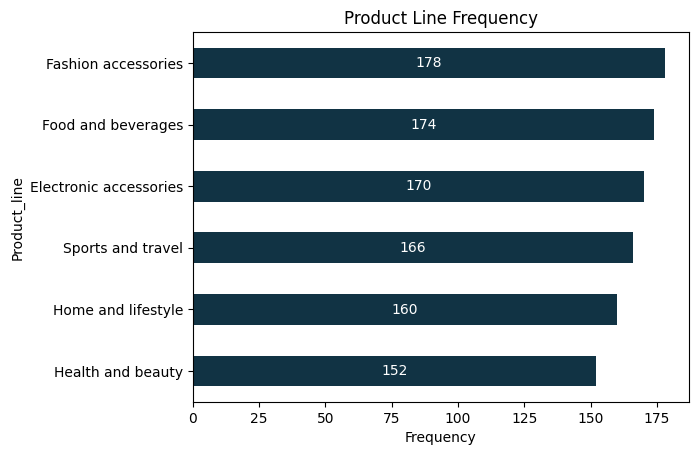

In [19]:
fig = df["Product_line"].value_counts().sort_values().plot(kind="barh", color="#134")
plt.bar_label(fig.containers[0], label_type="center", color="white")
plt.title("Product Line Frequency")
plt.xlabel("Frequency")

plt.show()

In [20]:
# Conver Date From Object Into Datetime
df["Date"] = pd.to_datetime(df["Date"])

In [21]:
print(f"Oldest Date: {df['Date'].min()}")
print(f"Newest Date: {df['Date'].max()}")


print(f"Difference Btween Oldest & Newest: {df['Date'].max() - df['Date'].min()}")

Oldest Date: 2019-01-01 00:00:00
Newest Date: 2019-03-30 00:00:00
Difference Btween Oldest & Newest: 88 days 00:00:00


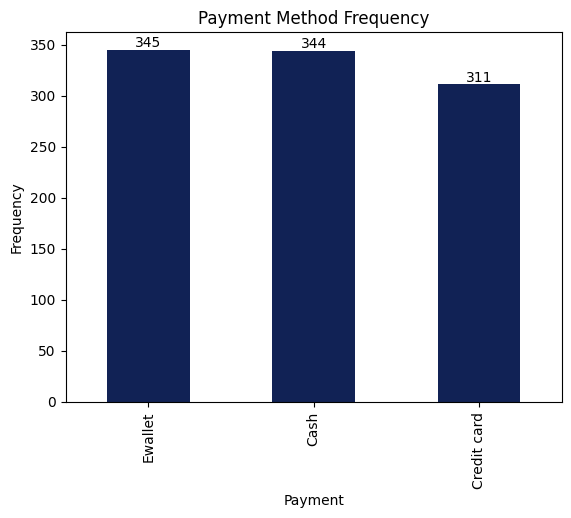

In [22]:
fig = df['Payment'].value_counts().plot(kind="bar", color="#125")
plt.title("Payment Method Frequency")
plt.ylabel("Frequency")
plt.bar_label(fig.containers[0])
plt.show()

In [23]:
# Using Our Function To Get a Description about specific Column
get_column_info("cogs")

Cost of goods sold


C:\Users\andi\AppData\Local\Temp\ipykernel_15844\3565649055.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_schema.loc[col_name.upper()][0])


In [24]:
print("Max Rate:",df["Rating"].max())
print("Min Rate:",df["Rating"].min())

Max Rate: 10.0
Min Rate: 4.0


# Correlation & Relation

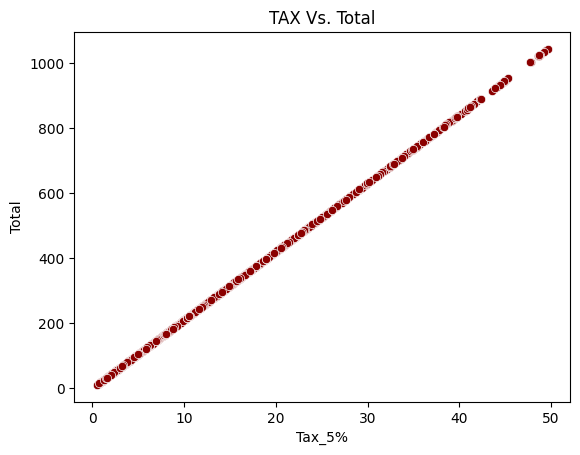

In [25]:
sns.scatterplot(data=df, x="Tax_5%", y="Total", color="darkred")
plt.title("TAX Vs. Total")
plt.show()

<h5 style="color: tomato">From Previous Graph a Strong Correlation Between TAX & Total</h5>

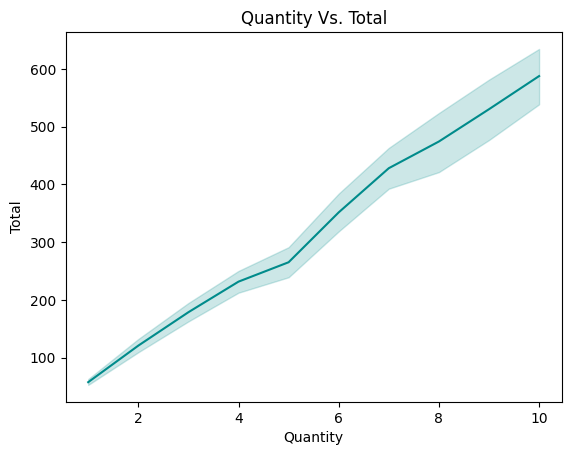

In [26]:
sns.lineplot(data=df, x="Quantity", y="Total", color="darkcyan")
plt.title("Quantity Vs. Total")
plt.show()

<h5 style="color: darkcyan">From previous Graph a Strong Correlation Between Quantity & Total</h5>

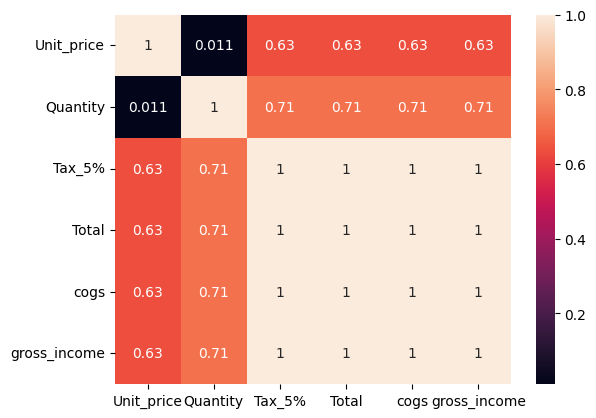

In [27]:
# Heatmap To See All Correaltion 
corr = df[['Unit_price', 'Quantity', 'Tax_5%', 'Total', 'cogs', 'gross_income']].corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

<h4> Previous HeatMap Tell Us alot...</h4>
<h4 style="color: tomato"> There Is Very Strong Correlation Between Many Numerical Columns(Features)</h4>

# Time To Ask Some Questions !!

In [28]:
df.head()

,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.690,7,26.142,548.971,2019-01-05,13:08,Ewallet,522.830,4.762,26.142,9.100
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.280,5,3.820,80.220,2019-03-08,10:29,Cash,76.400,4.762,3.820,9.600
2,A,Yangon,Normal,Male,Home and lifestyle,46.330,7,16.215,340.526,2019-03-03,13:23,Credit card,324.310,4.762,16.215,7.400
3,A,Yangon,Member,Male,Health and beauty,58.220,8,23.288,489.048,2019-01-27,20:33,Ewallet,465.760,4.762,23.288,8.400
4,A,Yangon,Normal,Male,Sports and travel,86.310,7,30.209,634.379,2019-02-08,10:37,Ewallet,604.170,4.762,30.209,5.300


### What Was The Total and Average Profit For Each Branch ??

In [29]:
df.pivot_table(index=df["Branch"], values="gross_income", aggfunc=["sum", "mean"])

,sum,mean
,gross_income,gross_income
Branch,,
A,5057.160,14.874
B,5057.032,15.232
C,5265.176,16.052


### What Was The Total Profit Per Each Month??

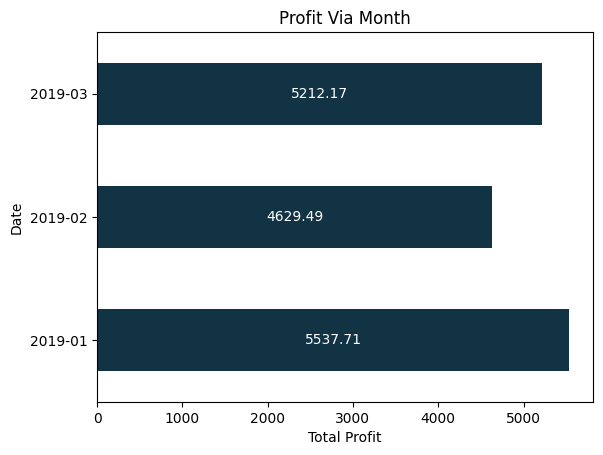

In [30]:
fig = df.groupby(df["Date"].dt.to_period("M"))["gross_income"].sum()\
.plot(kind="barh", color="#134")

plt.title("Profit Via Month")
plt.xlabel("Total Profit")

plt.bar_label(fig.containers[0], label_type="center", color="white")
plt.show()

### What Was The Most Product Line Get Profit??

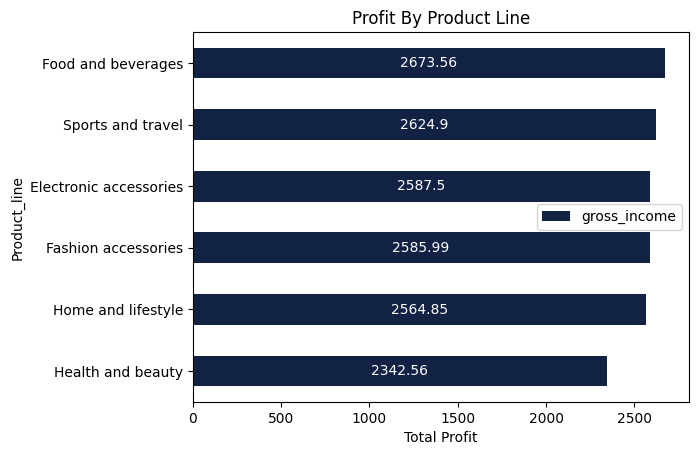

In [31]:
fig  = df.pivot_table(index="Product_line", values="gross_income", aggfunc="sum")\
.sort_values("gross_income")\
.plot(kind=  "barh", color="#124")

plt.title("Profit By Product Line")

plt.xlabel("Total Profit")
plt.bar_label(fig.containers[0], color="white", label_type="center")
plt.show()

### How Many Records Given Rating Less Than 5 ?

In [32]:
filt = df["Rating"] < 5

print("Number of Records With Rating Less The 5: ", len(df[filt]))
df.loc[filt, ["Branch", "City", "City", "gross_income", "Rating"]].head(10)

Number of Records With Rating Less The 5:  153


,Branch,City,City,gross_income,Rating
5,C,Naypyitaw,Naypyitaw,29.887,4.100
10,B,Mandalay,Mandalay,2.896,4.500
15,B,Mandalay,Mandalay,28.116,4.500
16,A,Yangon,Yangon,24.125,4.600
19,B,Mandalay,Mandalay,4.030,4.400
20,C,Naypyitaw,Naypyitaw,21.510,4.800
22,B,Mandalay,Mandalay,3.320,4.400
30,B,Mandalay,Mandalay,23.532,4.800
31,B,Mandalay,Mandalay,35.132,4.500
37,A,Yangon,Yangon,27.396,4.700
